In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data = pd.read_csv("D:/ai/neural networks/ph.csv")
data.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [3]:
data.describe()

,X,Y
count,34.000000,34.000000
mean,7.661765,142.794118
std,0.501522,55.787356
min,6.700000,35.000000
25%,7.300000,107.000000
50%,7.600000,147.000000
75%,8.000000,186.500000
max,8.800000,262.000000


In [5]:
data.corr()

,X,Y
X,1.000000,-0.339511
Y,-0.339511,1.000000


In [4]:
data.isnull().sum()

X    0
Y    0
dtype: int64

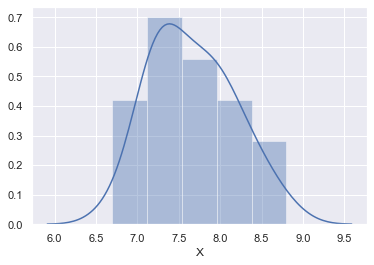

In [6]:
sns.set(style = 'darkgrid')
sns.distplot(data['X'])

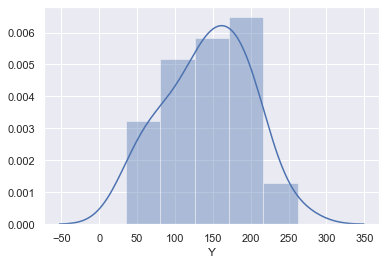

In [7]:
sns.set(style = 'darkgrid')
sns.distplot(data['Y'])

In [8]:
# Z-SCORE
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

[[0.12500664 0.25847285]
 [1.13696519 0.56778404]
 [1.08934361 0.58597881]
 [0.32739835 0.8225109 ]
 [0.52979006 0.51319971]
 [0.27977677 0.00374598]
 [0.73218177 1.3501594 ]
 [0.68456019 0.85890045]
 [1.13696519 0.01444879]
 [0.32739835 0.85890045]
 [0.8869519  1.31376985]
 [1.3393569  1.02265344]
 [0.73218177 2.16892432]
 [0.27977677 0.6876555 ]
 [0.73218177 0.39653909]
 [0.68456019 1.12433013]
 [1.69651874 1.10613535]
 [1.13696519 1.22279597]
 [1.08934361 1.07723776]
 [0.48216848 0.22208329]
 [0.12500664 0.25847285]
 [2.30369386 0.07652509]
 [0.93457348 0.17820178]
 [0.48216848 1.63378385]
 [0.8869519  1.57919952]
 [0.07738507 0.5420973 ]
 [1.49412703 1.96128982]
 [0.52979006 0.32375998]
 [0.73218177 1.21530401]
 [1.69651874 1.72475773]
 [0.27977677 0.07652509]
 [1.94653203 0.46931819]
 [1.13696519 0.71334225]
 [0.73218177 1.01516147]]


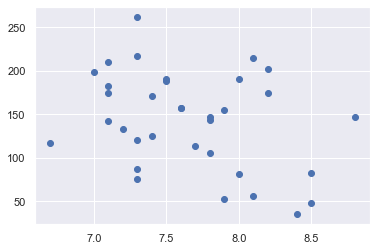

In [10]:
# Visualising data points using a Scatter plot
plt.scatter(data['X'],data['Y'])

there is no ouliners 


In [19]:

filter = data[(z < 3).all(axis=1)]
filter.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [63]:
old_data = data.copy()


In [43]:
data_x = data['X']
data_y = data['Y']

# normalising the data
data_x = (data_x - data_x.min())/(data_x.max() - data_x.min())
data_y = (data_y - data_y.min())/(data_y.max() - data_y.min())
data_x

data_x = np.array(data_x)
data_y = np.array(data_y)
nmd =[]
for i in range(len(data_x)):
  nmd.append([data_x[i],data_y[i]])

nmd[1:10]

[[0.19047619047619016, 0.6123348017621145],
 [0.7142857142857136, 0.6167400881057269],
 [0.38095238095238076, 0.6740088105726872],
 [0.3333333333333333, 0.5991189427312775],
 [0.5238095238095235, 0.47577092511013214],
 [0.2857142857142855, 0.801762114537445],
 [0.6190476190476188, 0.6828193832599119],
 [0.19047619047619016, 0.4713656387665198],
 [0.38095238095238076, 0.6828193832599119]]

In [44]:
from sklearn.model_selection import train_test_split


In [45]:
data_train,data_test = train_test_split(nmd,test_size=0.1)

In [46]:
#training the model

In [47]:
df = pd.DataFrame(data=data_train)

In [48]:
df

,0,1
0,0.000000,0.361233
1,0.523810,0.493392
2,0.428571,0.537445
3,0.285714,0.229075
4,0.619048,0.682819
5,0.571429,0.079295
6,0.190476,0.471366
7,0.476190,0.343612
8,0.571429,0.528634
9,0.666667,0.792952


In [49]:
ns = df.shape[0]
ns

30

In [56]:
n=0.1
i=0 
epochs=100
m=1
c=-1
while i<epochs:
    for j in range(0,ns):
        dm=(-1)*(df[1][j]-m*df[0][j]-c)*(df[0][j])
        dc=(-1)*(df[1][j]-m*df[0][j]-c)
        ddm=(-1)*n*dm
        ddc=(-1)*n*dc
        m=m+ddm
        c=c+ddc
    i=i+1
    
print(m,c) 

-0.2598511866029636 0.6496315376281083


In [57]:
df['yp']=np.nan

In [58]:
for i in range(0,ns):
    df['yp'][i]=m*df[0][i]+c


In [59]:
df

,0,1,yp
0,0.000000,0.361233,0.649632
1,0.523810,0.493392,0.513519
2,0.428571,0.537445,0.538267
3,0.285714,0.229075,0.575388
4,0.619048,0.682819,0.488771
5,0.571429,0.079295,0.501145
6,0.190476,0.471366,0.600136
7,0.476190,0.343612,0.525893
8,0.571429,0.528634,0.501145
9,0.666667,0.792952,0.476397


In [60]:
mse = 0
for i in range(0,ns):
  mse += (df[1][i] -df['yp'][i])**2
mse = mse/ns
mse

0.055212465689398325

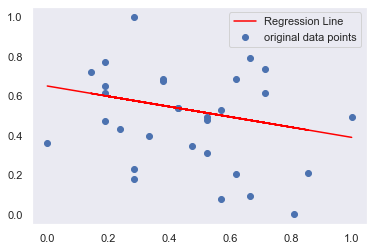

In [62]:
plt.plot(df[0],df['yp'],'red',label="Regression Line")
plt.scatter(df[0],df[1],label="original data points")


plt.legend()
plt.grid()

plt.show()
%matplotlib inline

In [64]:
min_x = old_data['X'].min()
max_x = old_data['X'].max()
min_y = old_data['Y'].min()
max_y = old_data['Y'].max()
print(min_x,min_y,max_x,max_y)

6.7 35 8.8 262


In [68]:
x = float(input("enter the pH of well water:"))
xx = x
x = (x - min_x)/(max_x - min_x)
y = m*x + c
y = y*(max_y - min_y) + min_y
print("Total number of bicarbonates in well water having pH =",xx,"is",y)

enter the pH of well water:7.6
Total number of bicarbonates in well water having pH = 7.6 is 157.18655074492088
